# Image Segmentation with YOLO SAM (Segment Anything Model)

In this tutorial, we'll explore how to use the YOLO SAM (Segment Anything Model) for image segmentation. We'll go through the process step-by-step, from loading the model to visualizing the segmentation results.


## 1. Setup and Imports
First, let's (first download if you dont already have em) import the necessary libraries:


In [1]:
!pip install -q ultralytics
!pip install -q opencv-python
!pip install -q numpy
!pip install -q matplotlib

In [2]:
from ultralytics import SAM
from ultralytics import FastSAM
import cv2
import numpy as np
import matplotlib.pyplot as plt

These libraries will help us load the model, process images, and visualize results.


## 2. Load the SAM Model
We'll use the mobile version of SAM, which is optimized for faster inference:


In [3]:
# Load the model
model = SAM("mobile_sam.pt")

# try out these models too and see the results
# model = FastSAM("FastSAM-s.pt")
# model = FastSAM("FastSAM-x.pt")
# Document results using other yolov models too

The mobile_sam.pt is a pre-trained model file. It will be downloaded automatically when you first execute this line .


## 3. Predict Segmentation
Now, let's use our model to predict segmentation on an image:


In [4]:
# Perform prediction (this process might take 2-5 minutes if you're using CPU(which is default) [Hint u can increase his speed by using some other computing unit])
results = model.predict(source="images.jpeg")       # you MUST load your own image for this line to work
# print(results)


image 1/1 /Users/pranjayyelkotwar/Desktop/NeenaSOP/BITSAuto_lite/images.jpeg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 124200.2ms
Speed: 12.4ms preprocess, 124200.2ms inference, 10.8ms postprocess per image at shape (1, 3, 1024, 1024)


This step processes the image and returns segmentation results. The results object contains various information about the detected segments.


## 4. Examine and Process the Masks
Let's take a closer look at the mask data:


In [5]:
masks = results[0].masks.data
masks = masks.numpy()
print(masks)


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

This gives us a numpy array of our mask data, which we can manipulate more easily.

## 5. Load and Check the Original Image
It's often useful to know the dimensions of our original image:


In [6]:
image = cv2.imread("images.jpeg")
print(image.shape)

(183, 275, 3)


## 6. Create a Single Mask Image
We'll create a single image where each pixel value represents the index of the segment it belongs to:


In [7]:
my_mask = np.zeros((masks.shape[1], masks.shape[2]))

for i in range(masks.shape[0]):
    for j in range(masks.shape[1]):
        for k in range(masks.shape[2]):
            if masks[i][j][k]:
                my_mask[j][k] = i

print(my_mask)

[[          2           2           2 ...           8           8           8]
 [          2           2           2 ...           8           8           8]
 [          2           2           2 ...           8           8           8]
 ...
 [          4           4           4 ...           7           7           7]
 [          4           4           4 ...           7           7           7]
 [          4           4           4 ...           7           7           7]]


This creates a 2D array where each pixel value is the index of the segment it belongs to. If a pixel doesn't belong to any segment, its value remains 0.


## 7. Visualize and Save the Mask
Finally, let's visualize our mask and save it as an image:


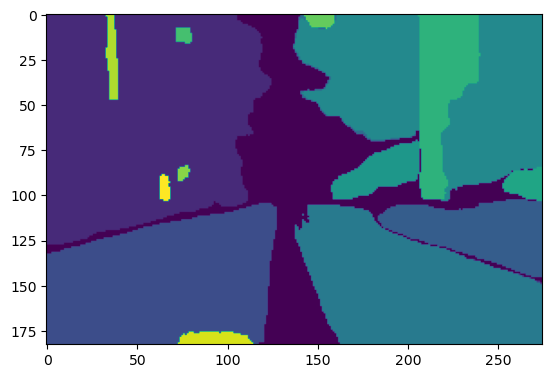

In [8]:
plt.imshow(my_mask)
plt.savefig("mask.png")


This creates a color-coded image of our segmentation mask and saves it as "mask.png".
## Conclusion
In this tutorial, we've walked through the process of using YOLO SAM for image segmentation. We've covered loading the model, making predictions, processing the results, and visualizing the output. This approach can be very useful in various computer vision tasks, including object detection, image analysis, and more.
Remember that the effectiveness of the segmentation can depend on the quality and content of your input image. Experiment with different images and see how the model performs!